In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils

from keras.datasets import mnist    #叫出mist資料集

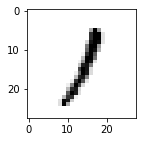

1


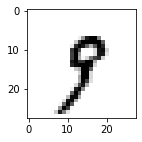

9


In [42]:
from keras.datasets import mnist

(x_train_image,y_train_lable),(x_test_image,y_test_lable) = mnist.load_data()

fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(x_train_image[99] , cmap = 'binary')
plt.show()
print(y_train_lable[99]) #lable值

fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(x_train_image[19] , cmap = 'binary')
plt.show()
print(y_train_lable[19]) #lable值

In [72]:
#資料預處理
x_Train = x_train_image.reshape(60000,784).astype('float32')   #轉換成1X784陣列
x_Test = x_test_image.reshape(10000,784).astype('float32')   #轉換成1X784陣列

x_Train_normalize = x_Train/255  #資料要介於0-1之間
x_Test_normalize = x_Test/255

y_Train_OneHot = np_utils.to_categorical(y_train_lable)  #傳換成1X10陣列
y_Test_OneHot = np_utils.to_categorical(y_test_lable)

#神經網路部屬
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 256, input_dim=784 , kernel_initializer='normal' , activation='sigmoid'))  #隱藏層256，輸入層784，relu線性觸發
model.add(Dense(units = 10 , kernel_initializer='normal' , activation='softmax')) #10個輸入層(first.h5)
print(model.summary())

#設定訓練
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'])
model.fit(x = x_Train, y = y_Train_OneHot, validation_split = 0.2, epochs = 10, batch_size = 800, verbose = 2) #60000*0.2分割，20回合，一次200張

scores = model.evaluate(x_Test_normalize , y_Test_OneHot)
print(scores[0])

model.save('first.h5')

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_54 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
60/60 - 0s - loss: 0.9635 - accuracy: 0.7703 - val_loss: 0.4519 - val_accuracy: 0.8928
Epoch 2/10
60/60 - 0s - loss: 0.3935 - accuracy: 0.8982 - val_loss: 0.3197 - val_accuracy: 0.9168
Epoch 3/10
60/60 - 0s - loss: 0.3064 - accuracy: 0.9172 - val_loss: 0.2723 - val_accuracy: 0.9263
Epoch 4/10
60/60 - 0s - loss: 0.2623 - accuracy: 0.9276 - val_loss: 0.2417 - val_accuracy: 0.9342
Epoch 5/10
60/60 - 0s - loss: 0.2359 - accuracy: 0.9344 - val_loss: 0.2252 - val_accuracy: 0.9362
Epoch 6/10
60/

In [75]:
#資料預處理
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
(x_train_image,y_train_lable),(x_test_image,y_test_lable) = mnist.load_data()


x_Test = x_test_image.reshape(10000,784).astype('float32')   #轉換成1X784陣列
x_Test_normalize = x_Test/255
y_Test_OneHot = np_utils.to_categorical(y_test_lable)

from tensorflow.keras.models import load_model
model = load_model('first.h5')

scores = model.evaluate(x_Test_normalize , y_Test_OneHot)
print(scores[1])

313/313 [==============================] - 0s 730us/step - loss: 0.9484 - accuracy: 0.7248
0.7247999906539917
